### **语言模型与递归神经网络**
**语言模型的主要任务**：给定一个词语序列，预测序列的概率$P(W_1,W_2,...W_n)$  

**一元语言模型**：假设每个词的出现是独立的，$P(W_1,W_2,...W_n)=\prod_{i=1}^m P(W_i)$

**n-gram 语言模型**：考虑前n-1个单词预测当前单词的概率，$P(W_1,W_2,...W_n)=\prod_{i=1}^m P(W_i|W_{i-n+1},...,W_{i-1})$

### **HMM（隐马尔可夫模型）**
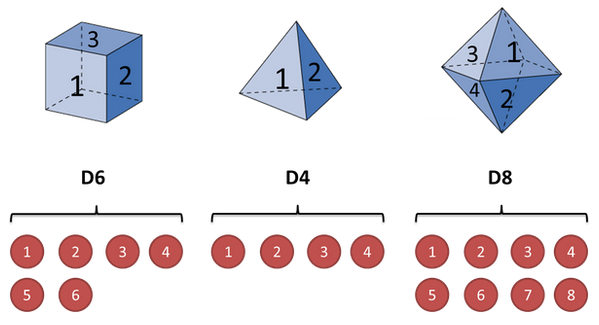

用这个例子来说明一些概念：

**隐含状态**：抽到哪种骰子

**可见状态**：抽到哪个数字

隐含状态之间有**转换概率**，可见状态之间没有，但是每个隐含状态到对应的可见状态有**输出概率**（D6就是1/6）

一般我们会缺少一些信息，一般解决三种问题：
1. 知道隐含状态数量（不同的骰子数量），以及状态间的转换概率矩阵A，隐状态对结果的发射概率矩阵B，观察到结果状态链，问系统生成这个结果的概率（评价）。
2. 知道隐含状态数量，以及状态间的转换概率矩阵A，隐状态对结果的发射概率矩阵B，观察到结果状态链，想知道最大概率的隐含状态链
• 如：观察云层情况，预测天气变化。
• 观察词序列，预测词性序列（词性标注）
• 观察字序列，预测分词标记。
3. 知道隐含状态数量，以及每个隐状态对结果的发射概率矩阵，观察到很多结果状态链， 想反推出每个状态之间的转换概率矩阵

#### HMM假设
1. 马尔可夫假设
   
   假设1：有限历史假设。当前状态$X_i$只依赖于$X_{i-1}$，即$P(X_i|X_1,...X_{i-1})=P(X_i|X_{i-1})$

   假设2：时间不动性假设。假设状态转移概率在整个时间序列上是固定的，即不随时间变化。即$P(X_i|X_{i-1})$不变。
2. 输出条件独立性假设
   
   $P(O_1,...O_T|X_1,X_2,...,X_T)=\prod_{t=1}^TP(O_t|X_t)$

**模型表示**

S：状态集合，${S_1,...,S_n}$

V：输出集合，${V_1,...,V_n}$

$\pi$：初始状态概率,${\pi_j}$

$A$：状态转移概率，${A_{ij}}$

$B$：状态输出概率，${B_{ij}}$

**已知模型参数和观察序列，预测隐状态结果**

隐状态解码算法中的向前向后算法（求最大值）：
1. 初始化：$p_1(j)=\pi_jb_j(O_1)$, $q_1(j)=0$
2. 动态规划的思想
   
   $p_{t+1}(j)=\max_{1\le i\le n}[p_t(i)a_{ij}]b_{j,O_{t+1}}$
   
   $q_{t+1}(j)=\text{arg}\max_{1\le i\le n}[p_t(i)a_{ij}]$

   计算完之后进行回溯

### **序列编码与生成（Seq2seq）模型**
将一个作为输入的序列映射为一个输出的序列。**Encoder**把输入序列映射为固定长度的向量，**Decoder**把这个向量解码为输出。

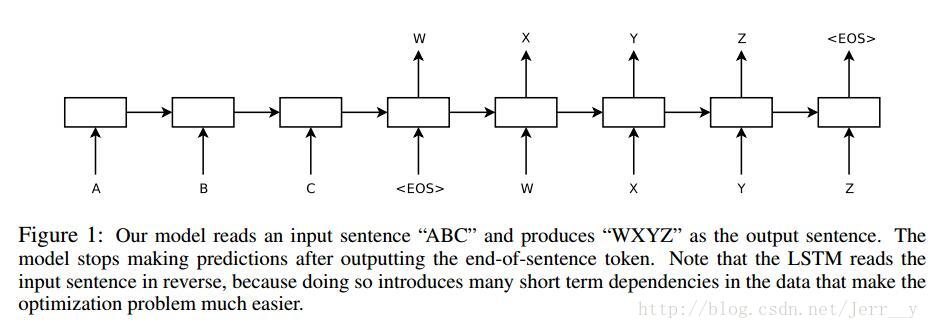

常见的神经网络语言模型包括前馈神经网络语言模型（Feedforward NNLM）和循环神经网络语言模型（Recurrent NNLM）。

#### 前馈神经网络（Feedforward NNLM）
1. 将前 n-1 个词转换为嵌入向量。
2. 将嵌入向量连接（concat）并输入到前馈神经网络中。
3. 前馈神经网络输出一个概率分布，表示下一个词的可能性。

    $P(W_i|W_{i-n+1},...,W_{i-1})=\text{softmax}(W_h h+b_h)$，h是通过concat嵌入向量后通过隐藏层得到的状态

#### 循环神经网络（Recurrent NNLM）
1. 将当前词转换为嵌入向量。
2. 结合前一步的隐藏状态，更新当前隐藏状态。
3. 使用当前隐藏状态预测下一个词的概率分布。

    $h_t=\sigma(W_hx_t+U_th_{t-1}+b_h)$
    
    $P(W_i|W_{i-n+1},...,W_{i-1})=\text{softmax}(W_y h_t+b_y)$

**对比RNN和k阶序列回归模型**
| 特性                 | RNN                   | k阶序列回归模型      |
|----------------------|-----------------------|-----------------------|
| 结构                 | 神经网络，具有隐藏状态| 线性回归模型          |
| 依赖关系             | 长短期依赖关系 （累积）       | 固定长度的依赖关系    |
| 适用场景             | 自然语言处理、语音识别等 | 简单的时间序列预测    |
| 复杂度               | 高，训练复杂          | 低，计算效率高        |
| 非线性处理能力       | 强                    | 弱                    |
| 梯度问题             | 可能存在梯度消失或爆炸| 无此问题              |
| 变长输入处理         | 支持                  | 不支持                |


**RNN 序列编码的局限性**

RNN 是一个一阶模型：RNN 依赖于前一个隐藏状态和当前输入来计算当前输出。理论上，这种依赖结构使得 RNN 成为一阶模型。

模拟高阶模型：虽然 RNN 通过多个时间步的传播可以模拟高阶模型，但其编码能力可能不如真正的高阶模型。

弱于真正的高阶模型：真正的高阶模型能够直接利用更长的历史信息，而 RNN 在捕捉长时依赖关系时可能遇到梯度消失或梯度爆炸问题，这限制了其编码能力。

传统的Encoder-Decoder模型中，解码器在每个时间步的输入都是编码器生成的相同的上下文向量（通常是编码器最后一个隐藏状态），难以包含全部信息。先前的输入会逐级衰减。依赖于一个固定的上下文向量，而无法动态调整所需的上下文信息。

#### RNN模型代码实现

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), axis=1)
        hidden = self.i2h(combined)
        output = self.i2o(hidden)
        output = self.softmax(output)

#### **LSTM**
RNN容易产生梯度消失（t太小）或者梯度爆炸（t太大）。LSTM 通过引入门控机制，可以捕捉长时间依赖关系

**前向传播**

输入：当前时间步的输入$X_t$和前一个时间步的隐藏状态$H_{t-1}$

输入门：$I_t=\sigma(X_TW_{xi}+H_{t-1}W_{hi}+b_i)$

遗忘门（=0表示把前一个记忆细胞删除）：$F_t=\sigma(X_TW_{xf}+H_{t-1}W_{hf}+b_f)$

输出门：$O_t=\sigma(X_TW_{xo}+H_{t-1}W_{ho}+b_o)$

候选记忆细胞：$\tilde{C_t}=tanh(X_TW_{xc}+H_{t-1}W_{hc}+b_c)$

记忆细胞：$C_t=F_t\odot C_{t-1}+I_t \odot \tilde{C_t}$

隐藏状态：$H_t=O_t\odot tanh(C_t)$

输出：$Y_t = softmax(H_tW_{hd}+B_d)$

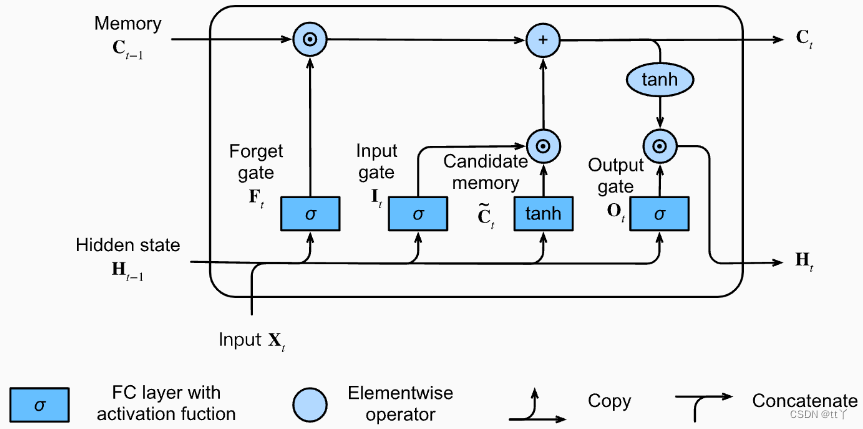

#### **Decoder-Encoder结构**
模型的框架为$h_t=\text{EncoderRNN}(e(x_t),h_{t-1})$->$s_t=\text{DecoderRNN}(d(y_t),s_{t-1})$->$\hat{y_t}=f(s_t)$

Encoder接受当前输入的嵌入表示，和前一步的隐藏状态，得到最终的隐藏状态$h_T$，从而$c=q(h_1,h_2,...,h_T)/h_T$作为Decoder的初始状态。Decoder接受目标序列（已知的输出序列，用来训练的）的嵌入表示，和前一步的隐藏状态，得到新的隐藏状态，并通过linear层预测输出。

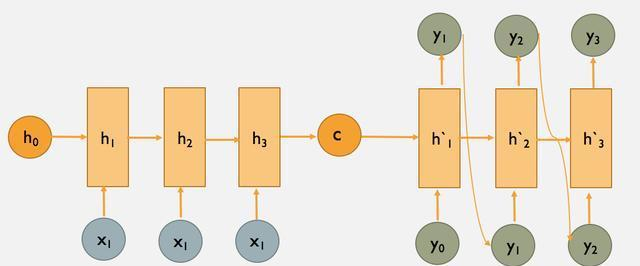

#### **训练过程：Teacher Forcing**
Teacher Forcing 是一种训练递归神经网络（RNN）的方法，其中在每一步的预测中，模型使用实际的目标输出而不是它自己之前的预测作为下一个时间步的输入。这样做可以加快训练收敛并提高模型的性能。

#### **解码过程：Beam Search**
Beam Search 是一种在解码过程中使用的启发式搜索算法，用于寻找最可能的翻译序列。它通过保留多个（beam width）最好的候选序列来避免贪心搜索带来的局限。

#### **Attention**
对于用一张图片，不同人关注的部分是不同的。在编码的时候能否编码出不同的向量供解码的时候参考呢？也就是强调接下来输出内容应该关注哪一部
分。本质上属于一种词典学习。更多的参数、更多的信息输入。

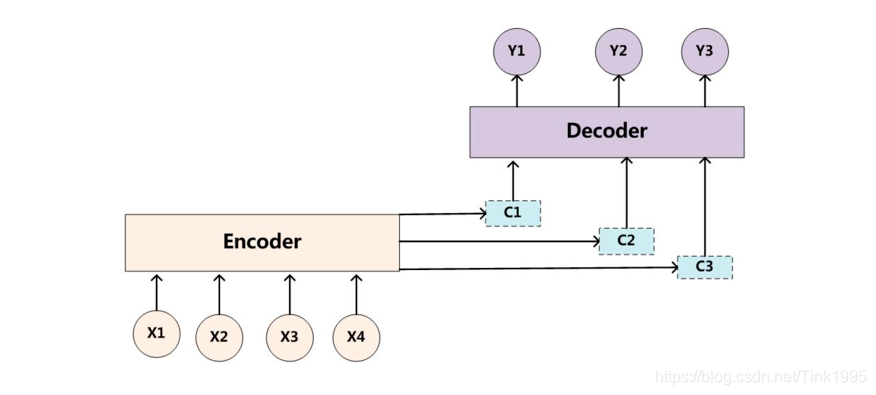

计算注意力权重：$\alpha_{t,i}=\dfrac{exp(score(s_t,h_i))}{\sum_{j=1}^Texp(score(s_t,h_j))}$

$c_t=\sum_{i=1}^T\alpha_{t,i}h_i$

**LSTM处理序列数据的缺点**

• 即使改善了长期依赖问题，处理超长序列（>500）依然很困难

• 计算时的时间开销很大，不便于并行化计算

### **Transformer**

1. 并行化和多头注意力机制

    **并行化**：使用self-attention使得每个时间步的计算可以并行

    **多头注意力机制**：多头注意力机制允许模型在不同的子空间中独立学习不同的特征，每个注意力头关注输入序列的不同部分。类似于CNN提取局部特征的方法

2. 自注意力机制使得每个词可以直接与序列中的其他词建立联系，无需逐步传递信息。这解决了 RNN 在长序列建模中信息逐级衰减的问题。


#### **Transformer的结构**
仍然是Encoder-Decoder结构。Encoder为6层编码器，Decoder也为6层解码器

编码器：一个Self-Attention层加一个FFN（前馈神经网络层）组成。Self-Attention层可以让对一些特定词汇编码的时候使用一定量其他词汇的信息。

解码器：一个Self-Attention层加一个Encoder-Decoder Attention层（类似seq2seq中的Attention）再加一个FFN（前馈神经网络层）。

词嵌入向量（512维）输入第一个编码器，之后编码器的输入维前一个编码器的输出。

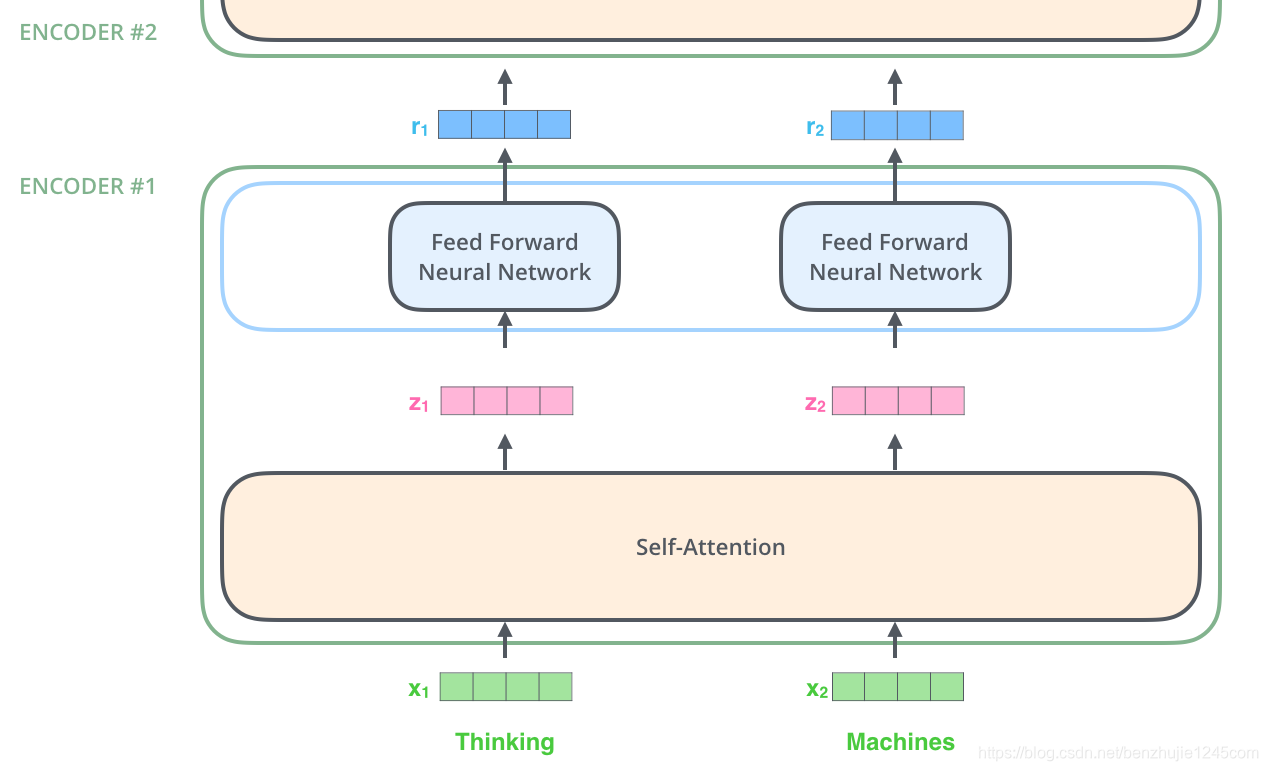

#### **Self-Attention机制**
Self-Attention 机制使得模型不仅能够关注当前位置的词，而且能够关注句子中其他位置的词，从而可以更好地编码这个词。

e.g. The animal didn’t cross the street because it was too tired

编码it的时候会关注“The animal“

$\text{Attention}(Q,K,V)=\text{softmax}(\dfrac{QK^T}{\sqrt{d_k}})V$

Q(Query),K(Key),V(Value)均为来自输入的矩阵，$d_k$为Key向量的维度。

**计算过程**
1. 对于每个词嵌入向量构建Q，K，V向量，这些向量的维度小于词嵌入向量的维度。$q_i=x_iW_Q$
2. 计算注意力分数。对于每个单词和其他位置单词的key向量进行点积，即$q_ik_j$，并除以$\sqrt{d_k}$
3. 将这些分数进行softmax归一化。
4. 把softmax值和Value向量相乘，并加权求和。

#### **多头注意力机制（Multi-head Attention）**
捕获在不同特征空间的特征，类似于CNN。

$MultiHead(Q,K,V)=Concat(head_1,head_2,...,head_h)W^O$

$head_i=Attention(QW_i^Q,KW_i^K,VW_i^V)$

#### **前馈神经网络（FFN）**
$FFN(x)=\max(0,xW_1+b_1)W_2+b_2$

**主要作用：将Attention后的特征升维再降维（提高模型容量），并且加入了非线性变换增强表示能力**

#### **残差连接和归一化**
在Self-Attention和FFN层之间有一个残差连接加归一化，即$sublayeroutput(x)=\text{LayerNorm}(x+\text{SubLayer}(x))$

**主要作用：防止过拟合、保持长期记忆、解决梯度消失和梯度爆炸问题**

#### **位置编码**
Transformer模型为每个输入的词嵌入向量添加一个向量。这些向量遵循模型学习的特定模式，有助于模型**确定每个词的位置**，或序列中不同词之间的距离。

#### **解码器**
第一个编码器的输入是一个序列，最后一个编码器的输出是一组注意力向量 Key 和 Value。

这些向量将在每个解码器的Encoder-Decoder Attention层被使用，这有助于解码器把注意力集中在输入序列的合适位置。每个decoder的输出都作为下一个decoder的输入。Encoder-Decoder Attention 层和多头注意力机制使用前一层的输出构造 Query 矩阵，而 Key 和 Value 矩阵来自于编码器栈的输出。

**Q：模型假如一直不输出<eos>咋办？**
1. 最大序列长度限制：

    设定一个最大生成长度（例如 50 或 100 个 token）。如果生成序列达到该长度仍未出现 <eos>，则强制终止生成过程。

1. 使用 beam search 等策略，在生成过程中只保留概率最高的若干个候选序列，这些候选序列中通常包含 <eos>。
惩罚机制：

1. 对重复生成的 token 或者某些模式（如连续生成相同 token）进行惩罚，以增加生成 <eos> 的概率。

![描述](/Users/shenqianfan/Desktop/大二下/python/final_review/20210522233047443.gif)

#### **MASK（掩码）**
对某些值进行掩盖，使其在参数更新时不产生效果。
1. Padding Mask
   
   因为每个批次输入序列的长度是不一样的，所以我们要对输入序列进行对齐。具体来说，就是在较短的序列后面填充（但是如果输入的序列太长，则是截断，把多余的直接舍弃）。
2. Sequence Mask
   
   为了使得 Decoder 不能看见未来的信息。也就是对于一个序列，在t时刻，我们的解码输出应该只能依赖于t时刻之前的输出，而不能依赖t之后的输出。


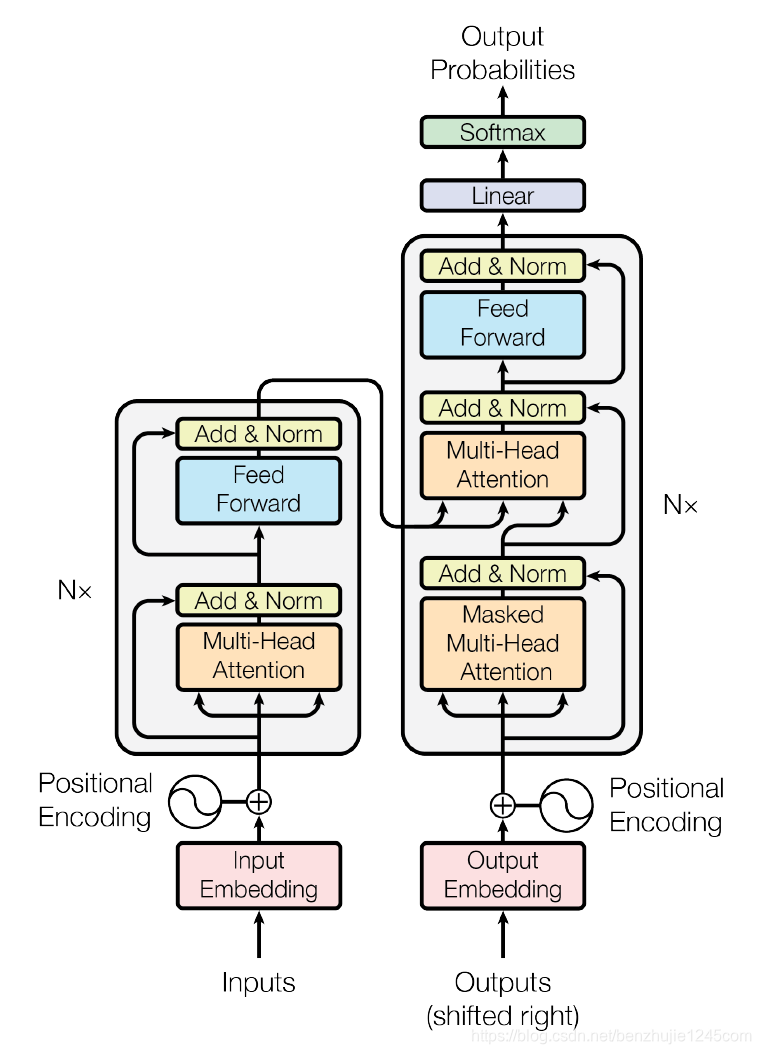

### 自然语言处理中的parsing
#### syntatic parsing 句法分析
**· constituency parsing（短语结构分析）**

关注的是句子中的成分（或短语）及其层级关系。基于上下文无关文法将句子分解为嵌套的短语结构，如名词短语（NP）、动词短语（VP）等。这种分析生成的是一个树状结构，称为句法树（Parse Tree），表示句子的分层结构。

In [ ]:
    S
   / \
  NP  VP
  |   | \
  D   V  PP
  |   |  / \
  The cat P  NP
         |  |
         on  D  N
            |  |
            the mat

但是可能会发生歧义。引入PCFG（带概率的上下文无关文法），PCFG在CFG的基础上增加了每条规则的概率。这些概率反映了在给定上下文中使用特定规则的可能性。PCFG有助于在多棵可能的语法树中选择最可能的那一棵。

**· dependency parsing（依存结构分析）**
#### Transition-Based Parser（算法）
依存句法任务，分析语言单位内成分之间的依存关系，揭示其句法结构。 直观来讲，它识别句子中的 “主谓宾”、“定状补” 这些语法成分，并分析各成分之间的关系。

**栈**：栈顶记为top，top下面的元素记为second（一开始只有一个元素root）

**缓冲区**：按顺序保存当前没有处理过的单词（初始时刻buffer的元素就是整个句子）

**shift操作**：将buffer的第一个元素移入栈

**left-arc操作**：从top到second连边，second出栈

**right-arc操作**：从second到top连边，top出栈

这个算法要训练的是如何选择action（3种操作）

**可用来提取特征的数据**: stack top, stack second, buffer top

**分类器的设计**

1. 三分类。
2. 2|R|+1分类。R为依存标签的集合，shift只有一种操作，left/right-arc都有｜R｜种操作
3. 训练两个分类器：一个专门预测label（条件概率），一个只预测shift、left-arc和right-arc。



### 语言模型的后门攻击

攻击者在训练阶段通过插入后门（backdoor）或触发器（trigger）来操纵模型，使其在特定输入模式下产生预期的恶意输出，同时在正常输入下保持良好的性能。这一块上课没讲，就没整理。。

### 自编码

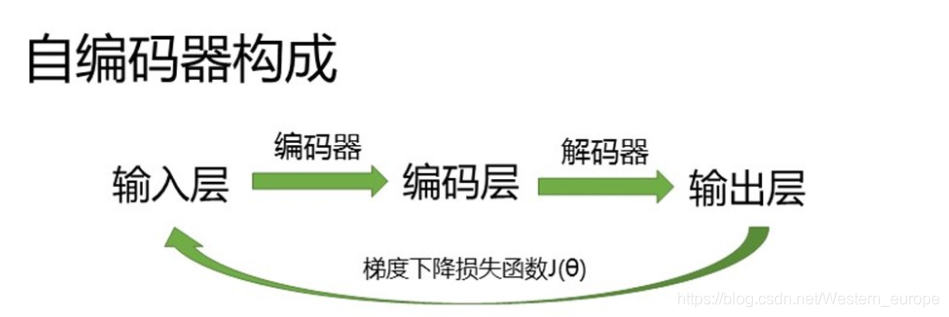

编码器负责把高维度数据有损映射成低维度数据，但是要学习数据之间的相关性。

解码器需要把低维数据映射到高维，增加数据，尽量拟合一开始的输入。

损失函数：MSE

文本序列的自编码模型有
1. **Word Embedding（词嵌入）**。词嵌入是将词汇表示为连续向量的技术，使得语义相似的词在向量空间中彼此接近。常见的词嵌入方法包括Word2Vec、GloVe和FastText。
2. **Reverse Translation（反向翻译）**。反向翻译是通过训练翻译模型，将输入句子翻译成目标语言，再将翻译结果翻译回原始语言。这种方法常用于数据增强和文本生成。可以增加数据多样性。
3. **BERT-预训练模型**。基于Transformer架构的预训练语言模型，通过在大规模语料上进行预训练，然后在特定任务上进行微调。采用双向Transformer编码器，利用上下文信息来捕捉词语的语义。预训练任务包括：

    Masked Language Modeling (MLM)：随机遮盖句子中的一些词，并预测这些被遮盖的词。

    Next Sentence Prediction (NSP)：预测两个句子是否相邻。


#### **对比有监督的网络模型**
| 特性       | 有监督网络模型             | 自编码网络                          |
|------------|-----------------------------|--------------------------------------|
| 目标       | 学习输入到输出的映射        | 学习数据的低维表示和重建             |
| 训练方式   | 依赖标注数据进行训练        | 无需标签，最小化重建误差             |
| 常见任务   | 分类、回归、分割            | 数据压缩、去噪、特征提取、生成       |
| 损失函数   | 任务特定的损失函数（如交叉熵、均方误差） | 重建误差（如均方误差）                |
| 应用场景   | 需要明确预测目标的任务      | 数据压缩、特征提取、异常检测、数据生成 |


#### **变分自编码器（VAE）**
与传统的自编码器有所不同，它采用了概率编码和解码的方式，并通过引入KL散度来强制潜在表示服从预先定义的高斯分布。

VAE假设输出数据X是由隐空间的变量Z生成的，也就是说$p(x,z)=p(x|z)p(z)=p(z|x)p(x)$，一般假设$z~N(0,1)$，$p(x|z)$由解码器网络来训练。

更详细的说，$p(x)=\sum_zp(x|z)p(z)$，并且假设$p(z|x_k)$服从正态分布的假设，有多少个X的输入，就训练多少个正态分布的参数。均值参数相当于对encoder出的结果进行加噪，方差参数用来调节噪声强度

参考：https://www.qixinbo.info/2018/07/24/vae/

### 预训练模型
#### 字面义上的预训练模型（Pre-trained Model）
利用数据资源训练好的模型，可以直接拿来应用（forward）。

#### 早期的预训练模型（Pre-train + fine tune）

**预训练**的目标是通过在大规模数据集上训练模型，学习到通用的特征表示，从而为下游任务提供一个良好的初始化。这些通用特征可以在多个任务和领域中共享，减少训练时间并提高模型的泛化能力。大型语料库上的预训练模型（PTM）已经可以学习**通用的语言表征**，

**微调**的目标是将预训练模型在特定任务或领域上进行调整，使其能够更好地适应具体的应用场景。

#### 预训练模型任务的设计
**Masked Language Model**

80%用mask替换单词，10%随机用别的单词替换，10%不变。本质上是自编码模型里加噪声，让输出尽可能和原来一样。